In [30]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
test_zip = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for t_zip in test_zip:
    print(t_zip[0], t_zip[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
coordinates

[(46.71087892762526, 68.45853957274025),
 (-17.654038152831916, 165.3786371825111),
 (-7.841755629293928, 67.6096418603133),
 (39.24036958529473, 65.52355738866981),
 (45.98223199201968, 89.79117382200559),
 (-56.188310154475595, 175.9184280761222),
 (-67.64810296161522, 158.62514461815067),
 (-82.14355929726639, 102.26274692945003),
 (8.761893019248376, 154.98267733023306),
 (-52.89636792190585, 177.3658037396595),
 (-23.882235246979974, -18.47461747514899),
 (-86.77385590471914, -140.73175859118248),
 (-10.006210728136338, 145.70014738267258),
 (-80.5700417217663, -31.95866317697937),
 (71.9304701014579, 104.80970311543882),
 (19.143929147593852, 174.43788758001358),
 (-80.0759369464822, 14.207870500685175),
 (-17.605333311743465, -177.45437450484448),
 (23.898647495316766, 12.23371954165603),
 (33.86909900304498, 105.47816825253989),
 (-36.14698821219954, 25.1033632615962),
 (-77.13236086459564, 75.41404843528582),
 (58.8586976623545, -95.04048615023524),
 (-70.081619121612, 89.3380

In [7]:
test = pd.DataFrame(x,y)
test.reset_index(level=0, inplace=True)
test

,index,0
0,-67.597413,25.129036
1,11.095321,25.920174
2,74.842331,26.625092
3,-76.891767,-59.989694
4,-61.133763,37.305713


In [8]:
# Unpack test_zip:
unpack_zip = list(test_zip)
unpack_zip

[]

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for t_city in unpack_zip:
    print(citipy.nearest_city(t_city[0], t_city[1]).city_name,
          citipy.nearest_city(t_city[0], t_city[1]).country_code)

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5dba396e4d6e0b1a7a9aa77c399dcb45


In [13]:
## Pseudocode:

# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
    # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities): # enumerate can retrieve both the index and values in a list

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhezkazgan
Processing Record 2 of Set 1 | lakatoro
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | maymanak
City not found. Skipping...
Processing Record 5 of Set 1 | altay
Processing Record 6 of Set 1 | kaitangata
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | dunedin
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | port moresby
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | neiafu
Processing Record 19 of Set 1 | gat
Processing Record 20 of Set 1 | beidao
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | busselton
Processing Record 23 

Processing Record 36 of Set 4 | mayo
Processing Record 37 of Set 4 | saleaula
City not found. Skipping...
Processing Record 38 of Set 4 | mana
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | upernavik
Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | tilichiki
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | vao
Processing Record 47 of Set 4 | sao jose da coroa grande
Processing Record 48 of Set 4 | byron bay
Processing Record 49 of Set 4 | augusto correa
Processing Record 50 of Set 4 | jalingo
Processing Record 1 of Set 5 | mantoudion
City not found. Skipping...
Processing Record 2 of Set 5 | artyk
City not found. Skipping...
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | ponta do sol
Processing Record 5 of Set 5 | channel-port aux basques
Processing Record 6 of Set 5 | carnarvon
Processing Record 7 of Set 5 | ta

Processing Record 24 of Set 8 | tahta
Processing Record 25 of Set 8 | sabha
Processing Record 26 of Set 8 | rawson
Processing Record 27 of Set 8 | aksu
Processing Record 28 of Set 8 | kavaratti
Processing Record 29 of Set 8 | adela
Processing Record 30 of Set 8 | marzuq
Processing Record 31 of Set 8 | gusau
Processing Record 32 of Set 8 | marsa matruh
Processing Record 33 of Set 8 | minas de barroteran
Processing Record 34 of Set 8 | mao
Processing Record 35 of Set 8 | kokopo
Processing Record 36 of Set 8 | corinto
Processing Record 37 of Set 8 | tubuala
Processing Record 38 of Set 8 | ahipara
Processing Record 39 of Set 8 | fortuna
Processing Record 40 of Set 8 | baillif
Processing Record 41 of Set 8 | vysokogornyy
Processing Record 42 of Set 8 | dosso
Processing Record 43 of Set 8 | ust-kuyga
Processing Record 44 of Set 8 | eydhafushi
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | quang ngai
Processing Record 47 of Set 8 | makaha
Processing Recor

Processing Record 13 of Set 12 | jardinopolis
Processing Record 14 of Set 12 | kattivakkam
Processing Record 15 of Set 12 | campos altos
Processing Record 16 of Set 12 | chagda
City not found. Skipping...
Processing Record 17 of Set 12 | biak
Processing Record 18 of Set 12 | bac lieu
Processing Record 19 of Set 12 | cordoba
Processing Record 20 of Set 12 | marsh harbour
Processing Record 21 of Set 12 | bay roberts
Processing Record 22 of Set 12 | rocha
Processing Record 23 of Set 12 | kangaatsiaq
Processing Record 24 of Set 12 | blackwater
Processing Record 25 of Set 12 | okha
Processing Record 26 of Set 12 | oblivskaya
Processing Record 27 of Set 12 | anadyr
Processing Record 28 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 29 of Set 12 | grand forks
Processing Record 30 of Set 12 | las cruces
Processing Record 31 of Set 12 | necochea
Processing Record 32 of Set 12 | mubarakpur
Processing Record 33 of Set 12 | pestovo
Processing Record 34 of Set 12 |

In [16]:
len(city_data )

544

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhezkazgan,47.80,67.71,42.21,51,0,4.45,KZ,2020-04-15 22:48:00
1,Lakatoro,-16.10,167.42,78.80,88,90,3.36,VU,2020-04-15 22:48:00
2,Hithadhoo,-0.60,73.08,84.18,73,88,9.86,MV,2020-04-15 22:47:41
3,Altay,47.87,88.12,43.45,39,86,7.56,CN,2020-04-15 22:48:01
4,Kaitangata,-46.28,169.85,55.00,61,44,11.01,NZ,2020-04-15 22:48:01
5,Bluff,-46.60,168.33,51.01,73,70,15.99,NZ,2020-04-15 22:47:56
6,Albany,42.60,-73.97,46.99,31,40,9.17,US,2020-04-15 22:45:30
7,Kavieng,-2.57,150.80,82.99,69,100,3.53,PG,2020-04-15 22:48:02
8,Dunedin,-45.87,170.50,55.00,63,32,11.01,NZ,2020-04-15 22:46:02
9,Jamestown,42.10,-79.24,41.00,92,90,9.17,US,2020-04-15 22:46:35


In [18]:
# Arrange columns:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhezkazgan,KZ,2020-04-15 22:48:00,47.80,67.71,42.21,51,0,4.45
1,Lakatoro,VU,2020-04-15 22:48:00,-16.10,167.42,78.80,88,90,3.36
2,Hithadhoo,MV,2020-04-15 22:47:41,-0.60,73.08,84.18,73,88,9.86
3,Altay,CN,2020-04-15 22:48:01,47.87,88.12,43.45,39,86,7.56
4,Kaitangata,NZ,2020-04-15 22:48:01,-46.28,169.85,55.00,61,44,11.01
...,...,...,...,...,...,...,...,...,...
539,Husavik,IS,2020-04-15 22:49:56,66.04,-17.34,33.80,74,75,9.17
540,Trinidad,BO,2020-04-15 22:49:56,-14.83,-64.90,71.60,78,75,4.61
541,Rio Branco,BR,2020-04-15 22:49:56,-9.97,-67.81,73.40,100,75,5.82
542,Guane,CU,2020-04-15 22:49:56,22.20,-84.09,81.07,75,89,8.37


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'04/15/20'

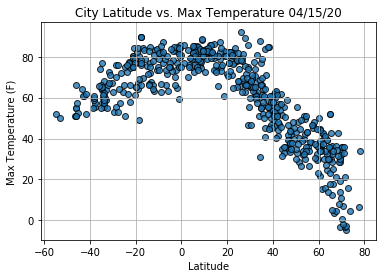

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

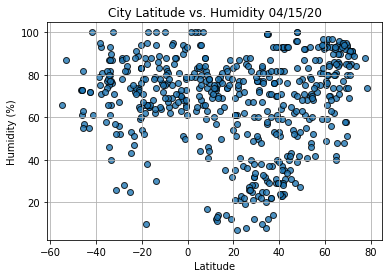

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

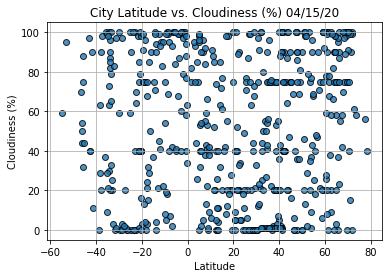

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

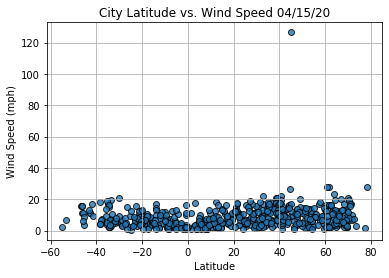

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

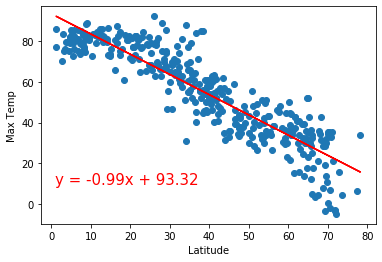

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp',(1,10))

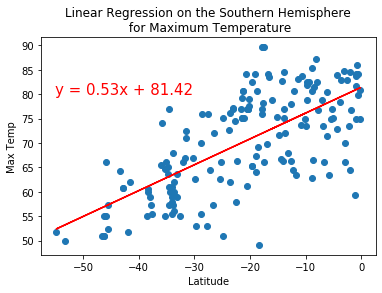

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature',
                       'Max Temp',(-55,80))

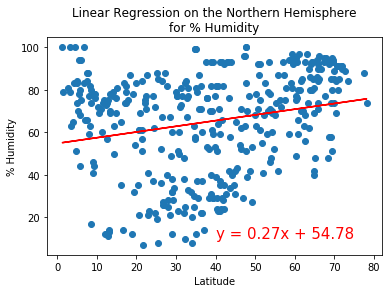

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

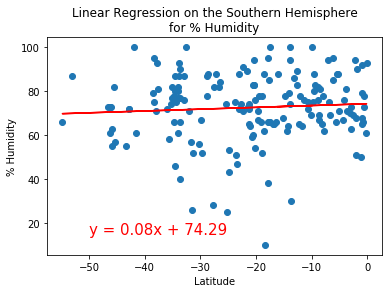

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

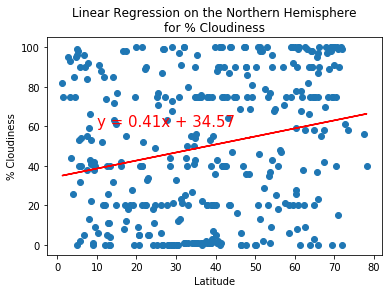

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(10,60))

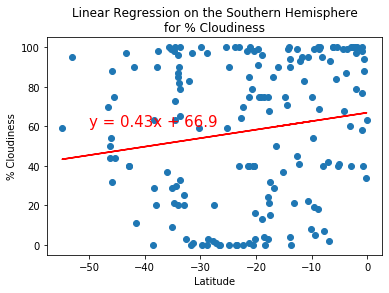

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

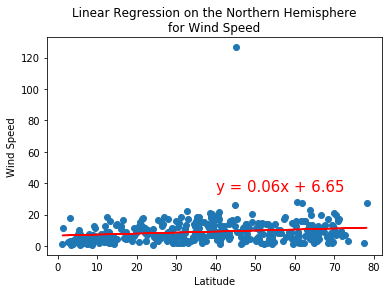

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

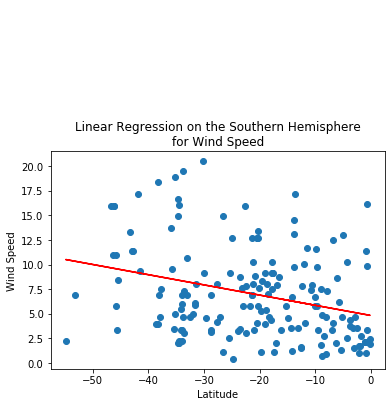

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))